# fordgobike-tripdata dataset exploration
## by Mohammad Aloufi

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system , covering the greater San Francisco Bay area. The dataset is about the trips that were made in February of 2019.
> GoBike program offers a biking transportation infrastructure to connect the people of the
bay area to numerous locations in SF, East Bay and San Jose. The Ford GoBike infrastructure involves having locations where people can rent bikes at any station and drop them off
at any station. As a result, the consumers never have to pay for an actual bike, deal with
maintenance of a bike, or worry about having a bike being stolen.

[source](https://www.wiseleywu.com/bikeshare/midterm-report.pdf)

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
#Load the dataset
df =pd.read_csv('fordgobike-tripdata.csv')
pd.options.display.max_rows =5000

In [19]:
#print a few stats
print(df.shape)
print(df.dtypes)
print(df.head(10))

(174952, 15)
start_station_name          object
end_station_name            object
user_type                   object
age                        float64
member_gender               object
bike_share_for_all_trip      int64
duration_min               float64
start_date                  object
start_hour                   int64
start_day                   object
start_month                 object
end_date                    object
end_hour                     int64
end_day                     object
end_month                   object
dtype: object
                                 start_station_name  \
0  Montgomery St BART Station (Market St at 2nd St)   
1                           Market St at Dolores St   
2                           Grove St at Masonic Ave   
3                               Frank H Ogawa Plaza   
4                      4th St at Mission Bay Blvd S   
5                              Palm St at Willow St   
6                        Washington St at Kearny St   
7       

### What is the structure of your dataset?

Please note: I've already  did some data wrangling on the dataset I'll be exploring. Please take a look at the wrangling.py file to see the details.
There are 174153 trips in this data set with the following features in no order:
1. duration_min: trip duration in minutes.
2. A group of datetime columns that explain the starting and ending day, month, and hour of trip.
3. start_station: name of the station the trip started from.
4. end_station: name of the station the trip ended in.
5. user_type: Customer or or Subscriber.
6. age: the age of the one who took the trip.
7. member_gender: the gender of the one who took the trip.
8. bike_share_for_all_trip: states if the user took a bike for all the trip

Most of the values are numbers, but we have the column "member_gender", male, female, other.


#### data wrangling changes

1. Removed the columns that I didn't think we need, such as: start_station_id, start_station_latitude, start_station_longitude, etc.
2. Dropped rows with missing values.
3. Converted the start_time and end_time columns to datetime objects.
4. Dropped the start_time and end_time columns after making new columns with separated values of each.
5. Made a new column that displays the trip duration in minutes instead of seconds and dropped duration_sec.
6. Renamed the member_birth_year to age.
7. Converted the birth years to an actual age with a simple calculation.
8. Converted the values in bike_share_for_all_trip  column to be 0 for no, and 1 for yes.

### What is/are the main feature(s) of interest in your dataset?

I'll be exploring to see what kind of users use the service and when.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think maybe age, the time and date columns, gender, and the duration_min.

## Univariate Exploration

Lets look at the age distribution

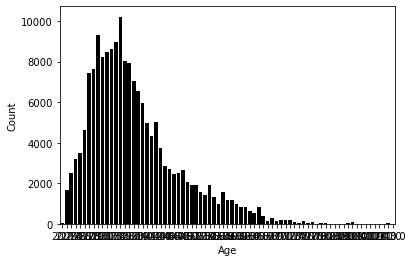

In [20]:
#Age graph
sns.countplot(data=df, x ='age', color ='black');
plt.xlabel('Age');
plt.ylabel('Count');

There are only 34 people who are at the age of 20. If we look from the ages 20 to 30 though, we can see that the people from 25 to 30 were on trips the most. Now this is actually regardless of the gender. Speaking of the gender, lets take a look at it.

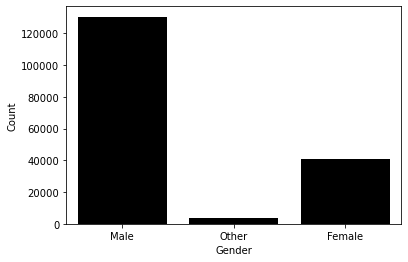

In [21]:
#Gender graph
sns.countplot(data=df, x ='member_gender', color ='black');
plt.xlabel('Gender');
plt.ylabel('Count');

So Males use the service more than females? That's not surprising to me. Lets look at the user type now.

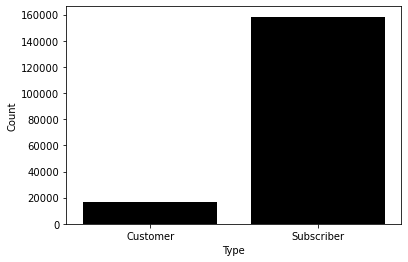

In [22]:
#User_type graph
sns.countplot(data=df, x ='user_type', color ='black');
plt.xlabel('Type');
plt.ylabel('Count');

As expected, the number of subscribers is more than the customers. Lets look at the trips in days.

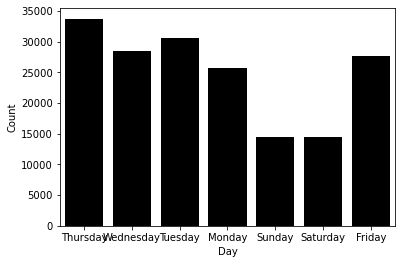

In [23]:
#Day graph
sns.countplot(data=df, x ='start_day', color ='black');
plt.xlabel('Day');
plt.ylabel('Count');

The weekends are low in activities compared to working days. Also the most active day was Thursday. With  that said, lets take a look at the hours.

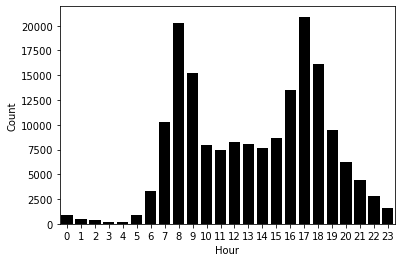

In [24]:
#Hour graph
sns.countplot(data=df, x ='start_hour', color ='black');
plt.xlabel('Hour');
plt.ylabel('Count');

Interesting, we can see that from 6 in the morning to 6 in the evening the number of trips was going sky high. This is probably because they're working hours. After 6 in the evening, the numbers started to go down slowly.
Lastly, lets look at the duration distribution

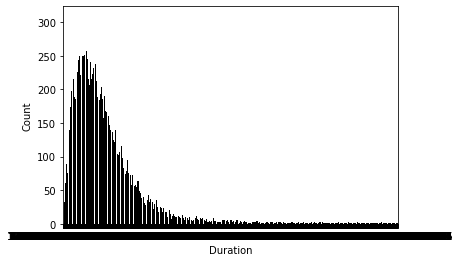

In [25]:
#Duration graph
sns.countplot(data=df, x ='duration_min', color ='black');
plt.xlabel('Duration');
plt.ylabel('Count');

Oh wow, didn't expect to see that. So most of the trips were short and I think that's normal, but some of them were surprisingly long as in over 20 hours.
FYI: 20 hours = 1200 minutes

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Yes, seeing that only 34 people were at the age of 20 is kinda unusual to me. On the other hand, I don't live in the area the dataset is covering so I have no idea if this normal where this is.
One other thing is the gender, there are I think over 3000 people with gender "other". To me, I was asking myself did those people not fill in their gender in the system? Did they prefer not to state their gender?
It doesn't really matter for what we're trying to do here though so it's alright.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Unusual? I think maybe the duration distribution was unusual to me, didn't expect to see trips this long, other than that, the data I explored so far gave the results I expected. For example there aren't too many trips at night, compared to the day where everyone is working so they have to go from home to work or something. Also you have the weekends, there aren't as many trips as in working days so that supports my theory I think.
As for if I changed the data, I already talked about that earlier before I started exploring the data, however I didn't change anything since I started the exploration.

## Bivariate Exploration

Lets take a look at the gender and how it goes along with the trip Duration

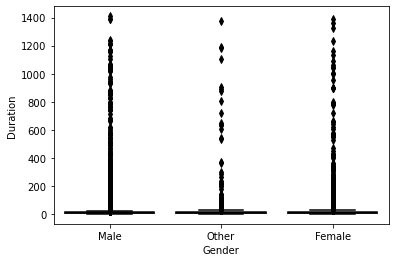

In [26]:
#Gender and duration
sns.boxplot(data=df, x ='member_gender', y ='duration_min', color ='black');
plt.xlabel('Gender');
plt.ylabel('Duration');

Males spend more time in trips than females.
Lets look at the duration of a trip and week days.

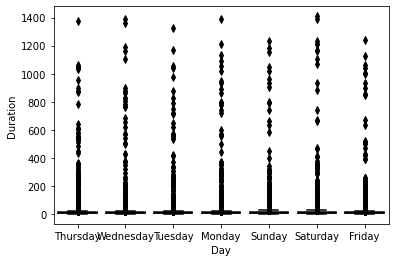

In [27]:
#week days and duration graph
sns.boxplot(data=df, x ='start_day', y ='duration_min', color ='black');
plt.xlabel('Day');
plt.ylabel('Duration');

So the trips on weekends are longer than the ones in working days, with Sunday being the longest.
Lets take a look at the relationship between the week days and the user type

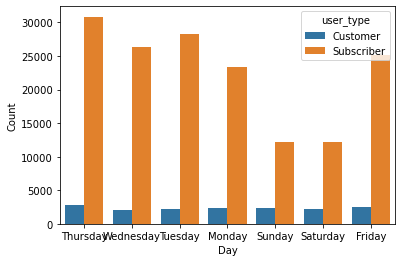

In [28]:
#Week days and user type
sns.countplot(data =df, x ='start_day', hue ='user_type');
plt.xlabel('Day');
plt.ylabel('Count');

It seems like subscribers use the survice more than customers. That's surprising to say the least. Even though, Customers and Subscribers seems like they go on trips on Thursdays the most, I wonder what's so special about Thursday, besides being a work day and all.
Now we look at the relationship between the age and week days

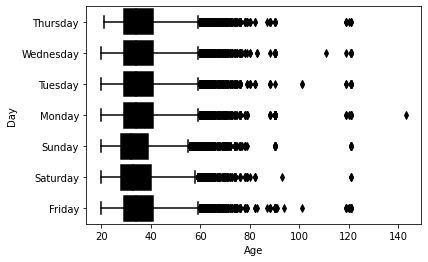

In [29]:
#Age and week days graph
sns.boxplot(data=df, x ='age', y ='start_day', color ='black');
plt.xlabel('Age');
plt.ylabel('Day');

Here, what I noticed is that the older the person is, the more trips they take in week days at least, weekends are low anyways as we already explored.
We'll look at the relationship between week days and the fact if the users use the sservice for all of their trip or not.

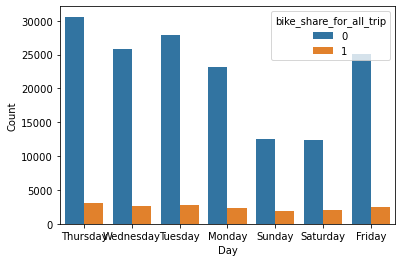

In [30]:
#Week days and user type
sns.countplot(data =df, x ='start_day', hue ='bike_share_for_all_trip');
plt.xlabel('Day');
plt.ylabel('Count');

When we look at when they don't use the service for all the trips, we can see that the most they don't use it for all the trip is on week days but it's a lot less in the weekends.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It's interesting to see the relationship between week days and when they don't use bike share for all the trips. I think this is something that can help the company see what's there for priority.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I haven't explored in this way really, but I would say that if we actually gathered more data about say other months or years even, we can know more information.

## Multivariate Exploration

Lets look at the week days and trips go, (in genders)

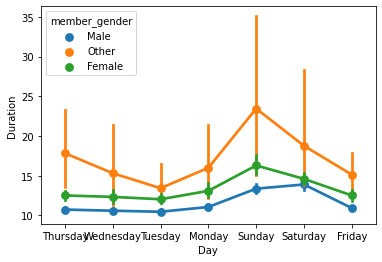

In [31]:
sns.pointplot(data =df, x ='start_day', y ='duration_min', hue ='member_gender');
plt.xlabel('Day');
plt.ylabel('Duration');

So in average, females take longer trips than males, not by much though.
Lets look at the same thing, but between customers and subscribers

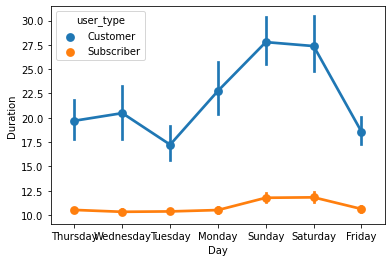

In [32]:
sns.pointplot(data =df, x ='start_day', y ='duration_min', hue ='user_type');
plt.xlabel('Day');
plt.ylabel('Duration');

Customers take longer trips than  subscribers in average.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I think yes, before, we saw that customers use bike share more than the actual people who subscribed to bike share, now we see in the last plot that customers go use bike share for longer trips even.

### Were there any interesting or surprising interactions between features?

Females take longer trips than males. It wasn't by much mind you, but earlier we saw that males go on trips way more than females. That was surprising to find out even though for a fact males take more trips, females still win when it comes to how long an actual trip is in average on a daily basis.